In [108]:
list.files("../Data")

[1] "ACC_matched.xlsx"                   "acc.csv"                           
 [3] "agri"                               "Autos.xlsx"                        
 [5] "Crude_Futures.csv"                  "Crude_spot.csv"                    
 [7] "Data File.csv"                      "Data File.xlsx"                    
 [9] "Data_for_Agri.zip"                  "Data_for_mid-term.zip"             
[11] "Data.csv"                           "Data.xlsx"                         
[13] "Lung Cap_Random_csv.csv"            "Lung Cap_Random.csv"               
[15] "Lung Cap_Random2.csv"               "mid_term"                          
[17] "New Microsoft Excel Worksheet.xlsx" "Regression_TCS.csv"                
[19] "RELIANCE_Bhavcopy_xls.xls"          "RELIANCE_Bhavcopy_xlsx.xlsx"       
[21] "RELIANCE_close price.csv"           "RELIANCE_number of trades.csv"     
[23] "RELIANCE_trade quantity.csv"        "sddg.xlsx"                         
[25] "TCS.csv"

In [109]:
x=read.csv(file="../Data/acc.csv")
head(x)

Symbol,Series,Date,Prev.Close,Open.Price,High.Price,Low.Price,Last.Price,Close.Price,Average.Price,Total.Traded.Quantity,Turnover,No..of.Trades
ACC,EQ,24-Apr-2017,1495.45,1518.00,1615.60,1513.55,1608.0,1607.00,1585.52,2098030,3326465258,67863
ACC,EQ,25-Apr-2017,1607.00,1610.05,1613.90,1587.65,1608.0,1607.30,1602.68,539573,864764442,31970
ACC,EQ,26-Apr-2017,1607.30,1607.30,1626.80,1591.10,1604.3,1601.60,1610.28,526758,848230324,23232
ACC,EQ,27-Apr-2017,1601.60,1603.00,1644.85,1589.05,1637.0,1636.00,1615.43,481629,778039859,23001
ACC,EQ,28-Apr-2017,1636.00,1626.65,1635.00,1606.05,1625.0,1626.55,1622.32,373117,605316304,15581
ACC,EQ,02-May-2017,1626.55,1625.00,1625.00,1570.00,1592.0,1593.05,1586.82,357316,566995646,15394


In [110]:
x1=x[, c(3,9)]
head(x1)

Date,Close.Price
24-Apr-2017,1607.00
25-Apr-2017,1607.30
26-Apr-2017,1601.60
27-Apr-2017,1636.00
28-Apr-2017,1626.55
02-May-2017,1593.05


In [111]:
x1$Returns=c(NA, diff(log(Close.Price)))
head(x1)

Date,Close.Price,Returns
24-Apr-2017,1607.00,NA
25-Apr-2017,1607.30,0.0001866658
26-Apr-2017,1601.60,-0.0035526230
27-Apr-2017,1636.00,0.0212511086
28-Apr-2017,1626.55,-0.0057930309
02-May-2017,1593.05,-0.0208107896


In [112]:
attach(x1)

The following objects are masked from x1 (pos = 3):

    Close.Price, Date, Returns

The following objects are masked from x1 (pos = 4):

    Close.Price, Date, Returns

The following objects are masked from x1 (pos = 5):

    Close.Price, Date

The following objects are masked from x1 (pos = 6):

    Close.Price, Date

The following objects are masked from x1 (pos = 8):

    Close.Price, Date



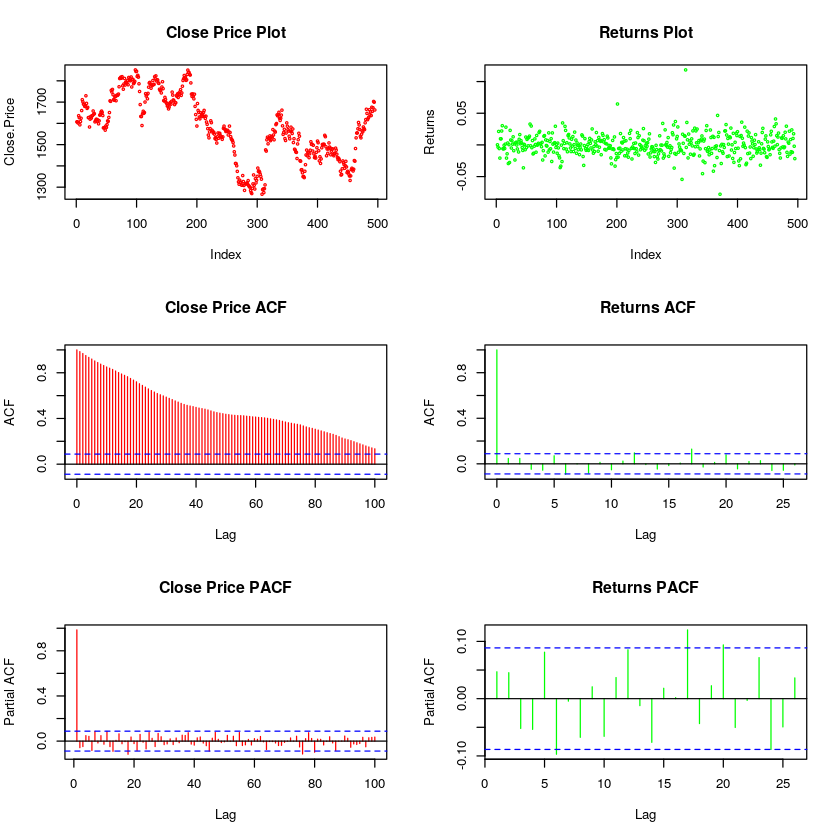

In [147]:
par(mfrow=c(3,2))
plot(Close.Price, col="Red" , cex = .4, pch=1, main="Close Price Plot")
plot(Returns, col="Green", cex = .4, pch=1, main="Returns Plot")
acf(Close.Price, 100,    col="Red", main="Close Price ACF")
acf(Returns[2:490],   col="Green", main=" Returns ACF")
pacf(Close.Price,100,    col="Red", main="Close Price PACF")
pacf(Returns[2:490],  col="Green", main="Returns PACF")

In [126]:
library(urca)

In [130]:
x_adf=ur.df(x1$Close.Price, type = "drift")
x1_adf@cval

,1pct,5pct,10pct
tau2,-3.44,-2.87,-2.57
phi1,6.47,4.61,3.79


In [131]:
x_adf@cval[1,2]

[1] -2.87

In [132]:
x_adf@teststat[1]

[1] -1.963331

In [135]:
summary(x_adf)
# H0: Non-Stationary
# H1: Stationary


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-115.357  -15.273   -1.567   15.374  159.588 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 24.145770  12.298659   1.963   0.0502 .
z.lag.1     -0.015200   0.007742  -1.963   0.0502 .
z.diff.lag   0.050014   0.045233   1.106   0.2694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.52 on 490 degrees of freedom
Multiple R-squared:  0.009557,	Adjusted R-squared:  0.005514 
F-statistic: 2.364 on 2 and 490 DF,  p-value: 0.09512


Value of test-statistic is: -1.9633 1.9315 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


In [144]:
require(forecast)

In [138]:
auto.arima(Returns[2:486])

Series: Returns[2:486] 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 0.0002757:  log likelihood=1299.38
AIC=-2596.76   AICc=-2596.76   BIC=-2592.58

In [143]:
model_x1=arima(Returns[2:486], order=c(0,0,0))
model_x1_residual=model_x1$residuals

In [ ]:
forecast_arima